In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

In [2]:
df = pd.read_csv('../datasets/clean_data.csv')

In [12]:
# No of records in dataset
df.shape

(2620, 8)

In [15]:
# Null records
df.isnull().sum()

price          0
area           0
status         0
bhk            0
bathroom    1217
age          891
location       0
builder        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   bathroom  1403 non-null   float64
 5   age       1729 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 163.9+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,2620.0,93.834683,113.609349,12.83,42.0,61.735,90.00,1422.0
area,2620.0,1282.925191,692.566319,300.00,877.0,1091.500,1471.25,6700.0
bhk,2620.0,2.443893,0.811984,1.00,2.0,2.000,3.00,8.0
bathroom,1403.0,2.359230,0.844951,1.00,2.0,2.000,3.00,7.0
age,1729.0,1.355119,2.102682,0.00,0.0,0.000,3.00,32.0


In [48]:
#df[df.status=='Under Construction']
df[df.age.isnull()]

,price,area,status,bhk,bathroom,age,location,builder
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
18,100.00,1833,Ready to move,3,NaN,NaN,Sholinganallur,Appaswamy Real Estate
50,65.69,1381,Ready to move,3,NaN,NaN,Tiruvottiyur,Hansa Estates
62,84.79,1220,Under Construction,3,3.0,NaN,Selaiyur,DAC Promoters
78,108.00,1972,Ready to move,3,NaN,NaN,Sholinganallur,Appaswamy Real Estate
...,...,...,...,...,...,...,...,...
2596,88.00,1062,Under Construction,2,2.0,NaN,Mogappair,GJ ESTATES
2597,73.71,1031,Under Construction,2,2.0,NaN,Selaiyur,GJ ESTATES
2598,44.00,898,Under Construction,2,2.0,NaN,Iyappanthangal,GJ ESTATES
2607,340.00,2030,Under Construction,4,3.0,NaN,T Nagar,HomeFirst


In [49]:
df.age.fillna(0,inplace=True)

In [51]:
df.age[df.age.isnull()]

Series([], Name: age, dtype: float64)

In [54]:
#bathrooms
print(f"Bathrooms : {df.bathroom.unique()}")
print(f"BHK : {df.bhk.unique()}")

Bathrooms : [nan  2.  1.  3.  4.  5.  6.  7.]
BHK : [2 3 4 1 5 6 8]


In [62]:
#df[(df.bathroom ==2)]
df[(df.bhk ==2)]

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd
9,24.56,622,Under Construction,2,NaN,0.0,Perungalathur,Isha Homes
13,51.46,919,Under Construction,2,NaN,0.0,Pammal,Asset Tree Homes
...,...,...,...,...,...,...,...,...
2615,27.50,750,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2616,27.50,750,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2617,30.00,800,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2618,31.50,850,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties


In [63]:
# fill NaN with -1 for bathrooms
df.bathroom.fillna(-1,inplace=True)

In [64]:
def find_bathroom(x,y):
    if y == -1:
        if x > 4:
            return x+1
        else:
            return x
    else:
        return y

In [68]:
df['bathroom'] = df.apply(lambda x: find_bathroom(x['bhk'],x['bathroom']),axis=1)

In [70]:
df.isnull().sum()

price       0
area        0
status      0
bhk         0
bathroom    0
age         0
location    0
builder     0
dtype: int64

## Let's start with Univariate analysis

In [21]:
# for numeric coluns
#[feat for feat in df.columns if df[feat].dtypes != 'O']
numeric_cols = [feat for feat in df.select_dtypes(include=np.number)]

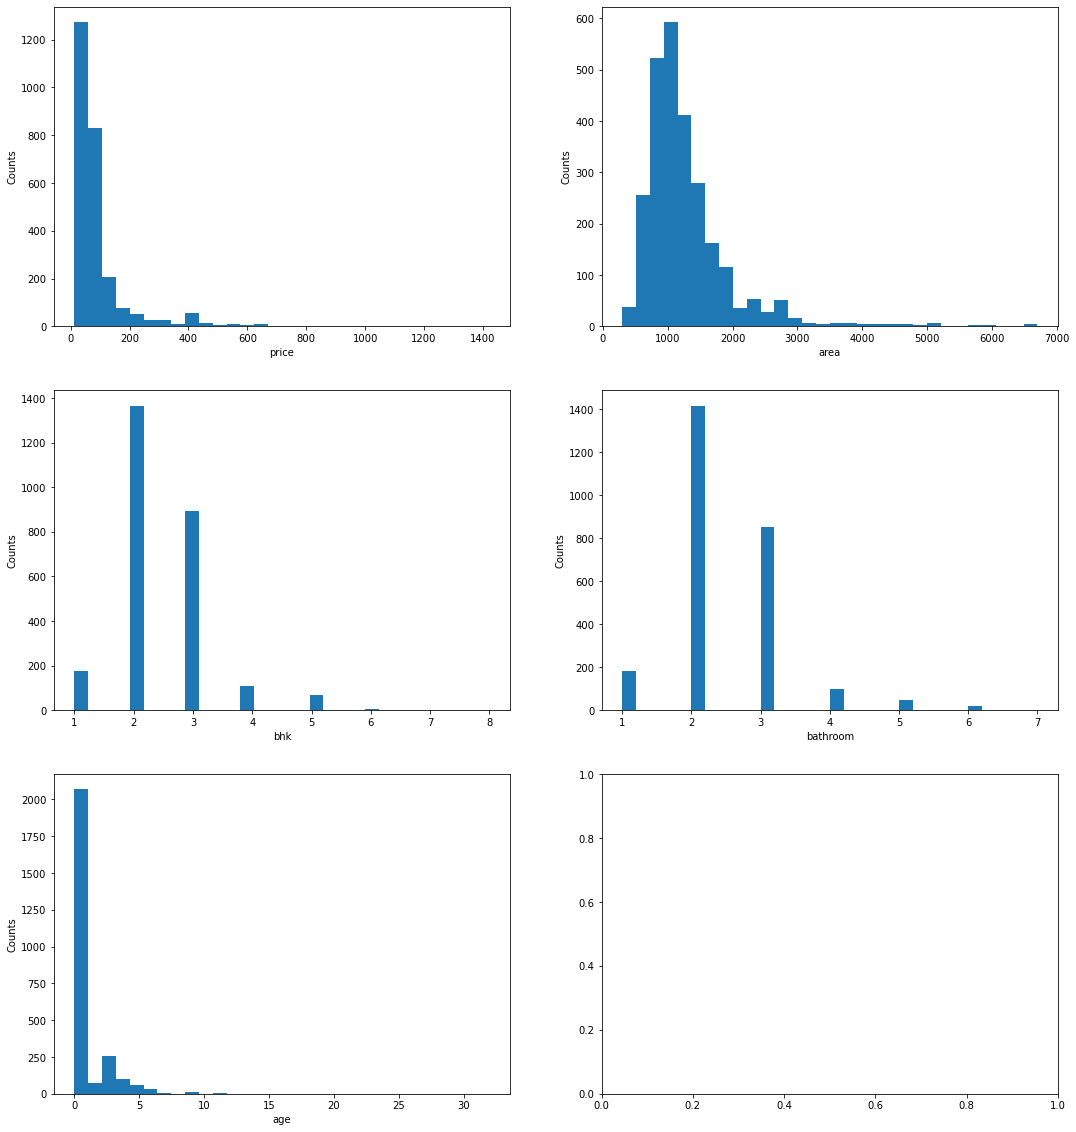

In [95]:
i,j=0,0
PLOTS_PER_ROW =2
fig, ax = plt.subplots(math.ceil(len(numeric_cols)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(18,20))
for feat in numeric_cols:
    ax[i][j].hist(df[feat],bins=30)
    ax[i][j].set_xlabel(feat)
    ax[i][j].set_ylabel("Counts")
    j+=1
    if j%PLOTS_PER_ROW ==0:
        i+=1
        j=0
plt.show()


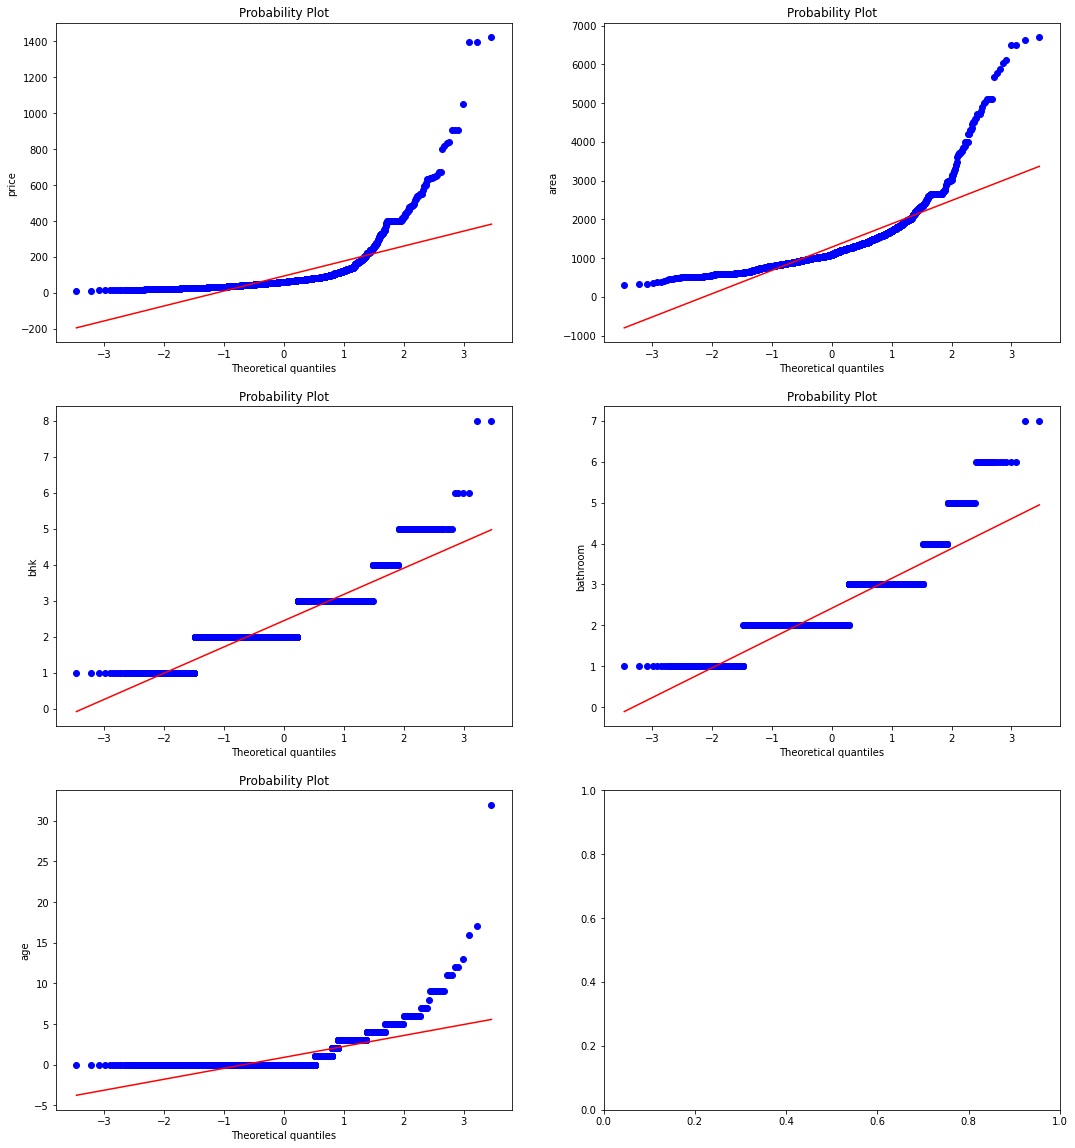

In [98]:
# QQ plot
i,j=0,0
PLOTS_PER_ROW = 2
fig, ax = plt.subplots(math.ceil(len(numeric_cols)/PLOTS_PER_ROW),PLOTS_PER_ROW,figsize=(18,20))
for feat in numeric_cols:
    stats.probplot(df[feat],plot = ax[i][j] )
    ax[i][j].set_ylabel(feat)
    j += 1
    if j%PLOTS_PER_ROW == 0:
        j=0
        i+=1
plt.show()

In [44]:
df.columns

Index(['price', 'area', 'status', 'bhk', 'bathroom', 'age', 'location',
       'builder'],
      dtype='object')

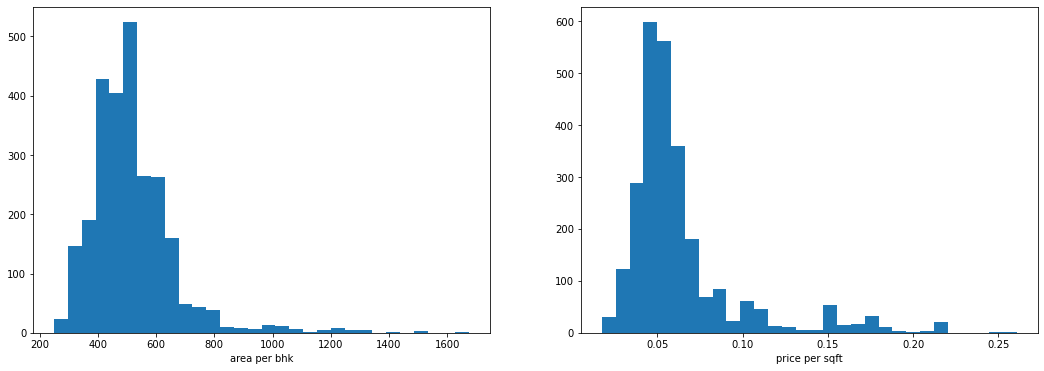

In [106]:
# area/bhk
area_per_bhk = df['area']/df['bhk']
price_per_sqft = df['price']/df['area']

fig,ax = plt.subplots(1,2, figsize=(18,6))
ax[0].hist(area_per_bhk,bins=30)
ax[0].set_xlabel("area per bhk")
ax[1].hist(price_per_sqft,bins=30)
ax[1].set_xlabel("price per sqft")
plt.show()

In [107]:
df['area_per_bhk'] = df['area']/df['bhk']
df['price_per_sqft'] = df['price']/df['area']

In [109]:
df['price_per_sqft'] = df['price_per_sqft']*100000

In [112]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,2620.0,93.834683,113.609349,12.830000,42.000,61.735000,90.000000,1422.000000
area,2620.0,1282.925191,692.566319,300.000000,877.000,1091.500000,1471.250000,6700.000000
bhk,2620.0,2.443893,0.811984,1.000000,2.000,2.000000,3.000000,8.000000
bathroom,2620.0,2.419466,0.819299,1.000000,2.000,2.000000,3.000000,7.000000
age,2620.0,0.894275,1.824666,0.000000,0.000,0.000000,1.000000,32.000000
area_per_bhk,2620.0,517.649752,147.914705,250.000000,427.625,499.583333,579.125000,1675.000000
price_per_sqft,2620.0,6387.418466,3409.167048,1743.119266,4600.000,5417.177914,6645.812201,26086.956522


In [121]:
# make a copy of df as df_main
df_main = df.copy()

In [122]:
# get the upper and lower limits to remove the outliers
apb_IQR = df['area_per_bhk'].quantile(0.75) - df['area_per_bhk'].quantile(0.25)
pps_IQR = df['price_per_sqft'].quantile(0.75) - df['price_per_sqft'].quantile(0.25)
lower_apb_limit = df['area_per_bhk'].quantile(0.25) - 1.5*apb_IQR
upper_apb_limit = df['area_per_bhk'].quantile(0.75) + 1.5*apb_IQR
lower_pps_limit = df['price_per_sqft'].quantile(0.25) - 1.5*pps_IQR
upper_pps_limit = df['price_per_sqft'].quantile(0.75) + 1.5*pps_IQR

In [123]:
lower_apb_limit, upper_apb_limit, lower_pps_limit, upper_pps_limit

(200.375, 806.375, 1531.2816985931831, 9714.530502344696)

In [136]:
df[(df['price_per_sqft'] < lower_pps_limit) | (df['price_per_sqft'] > upper_pps_limit)]

,price,area,status,bhk,bathroom,age,location,builder,area_per_bhk,price_per_sqft
11,240.0,1500,Ready to move,3,3.0,1.0,Anna Nagar,Pushkar Properties Pvt Ltd,500.000000,16000.000000
12,407.0,2200,Under Construction,3,3.0,0.0,Gopalapuram,Pushkar Properties Pvt Ltd,733.333333,18500.000000
17,224.0,1450,Under Construction,3,3.0,0.0,Anna Nagar,Kamalam Builder Pvt Ltd,483.333333,15448.275862
21,455.0,2601,Under Construction,4,4.0,0.0,T Nagar,Lifestyle Housing,650.250000,17493.271819
22,391.0,2475,Under Construction,4,4.0,0.0,Guindy,Puravankara Limited,618.750000,15797.979798
...,...,...,...,...,...,...,...,...,...,...
2575,215.0,1930,Under Construction,3,3.0,0.0,Perungudi,24K Realtors,643.333333,11139.896373
2577,169.0,1610,Under Construction,3,3.0,0.0,Kodambakkam,Luxclusive Homes,536.666667,10496.894410
2578,100.0,956,Under Construction,2,2.0,0.0,Kodambakkam,Luxclusive Homes,478.000000,10460.251046
2607,340.0,2030,Under Construction,4,3.0,0.0,T Nagar,HomeFirst,507.500000,16748.768473


In [137]:
df[(df['area_per_bhk'] < lower_apb_limit) | (df['area_per_bhk'] > upper_apb_limit)]

,price,area,status,bhk,bathroom,age,location,builder,area_per_bhk,price_per_sqft
36,330.0,3670,Ready to move,3,3.0,3.0,Kanathur Reddikuppam,Mayances Construction and Engineering Services,1223.333333,8991.825613
60,658.0,6103,Ready to move,4,4.0,5.0,Sholinganallur,Prestige Estates Projects Ltd,1525.750000,10781.582828
81,644.0,3681,Under Construction,4,4.0,0.0,T Nagar,Lifestyle Housing,920.250000,17495.245857
96,440.0,4896,Ready to move,4,4.0,3.0,Kanathur Reddikuppam,Mayances Construction and Engineering Services,1224.000000,8986.928105
135,327.0,4450,Under Construction,5,6.0,0.0,Mogappair,Casagrand Builder Private Limited,890.000000,7348.314607
...,...,...,...,...,...,...,...,...,...,...
2238,48.0,1126,Ready to move,1,2.0,3.0,Ottiyabakkam,Elite nisha,1126.000000,4262.877442
2363,330.0,4724,Ready to move,4,4.0,0.0,Sholinganallur,ARB HOMES,1181.000000,6985.605419
2429,405.0,3654,Under Construction,4,4.0,0.0,Perungudi,Luxclusive Homes,913.500000,11083.743842
2431,415.0,3746,Under Construction,4,4.0,0.0,Perungudi,Luxclusive Homes,936.500000,11078.483716


In [ ]:
# lets try 3rd std to remove 

In [135]:
# Let's have a look at high area and price records before removing outliers
#df[df.area > 2000][['price','area']]
df['area'].describe()
df[(df.bhk == 2) & (df.area < 600)][['area','price','bhk']]

,area,price,bhk
4,588,42.28,2
43,588,42.28,2
54,528,29.62,2
206,594,35.34,2
208,591,35.16,2
209,598,35.58,2
302,561,28.00,2
304,576,30.00,2
567,588,42.28,2
570,588,42.28,2


In [37]:
# outlier detection
std_price = df.price.std()
mean_price = df.price.mean()

In [39]:
df.price.describe()

count    2620.000000
mean       93.834683
std       113.609349
min        12.830000
25%        42.000000
50%        61.735000
75%        90.000000
max      1422.000000
Name: price, dtype: float64

In [43]:
#get 3rd min and max std 
#min_std_val = 
df.price.quantile(1-0.997)
df.price.quantile()

61.735

## Feature Engg

In [142]:
# let's handle categorical feature
#df['builder'].unique()
builder_stats = df['builder'].value_counts(ascending=False)
builder_stats

seller                               484
MC Foundation                        232
Appaswamy Real Estate                109
Propsource Realty Private Limited     79
Radiance Realty Developers            62
                                    ... 
Kaushik associates                     1
MAXWORTH PROPERTIES                    1
Jayakanthan                            1
Value reality                          1
S Suresh Kumar                         1
Name: builder, Length: 135, dtype: int64

In [143]:
builder_stats_less_then_10 = builder_stats[builder_stats <=10]
builder_stats_less_then_10

Prasanna               10
EK Realtors            10
SP Homes Pvt Ltd       10
BricksBurg              9
Shiva                   9
                       ..
Kaushik associates      1
MAXWORTH PROPERTIES     1
Jayakanthan             1
Value reality           1
S Suresh Kumar          1
Name: builder, Length: 79, dtype: int64

In [146]:
df['builder'] = df['builder'].apply(lambda x: 'other' if x in builder_stats_less_then_10 else x)

In [147]:
df['builder']

0                              MP Developers
1                              DAC Promoters
2          Casagrand Builder Private Limited
3                                      other
4       Radiance Realty Developers India Ltd
                        ...                 
2615                Velan Housing Properties
2616                Velan Housing Properties
2617                Velan Housing Properties
2618                Velan Housing Properties
2619                Velan Housing Properties
Name: builder, Length: 2620, dtype: object

In [148]:
#df['location'].unique()
location_stats = df['location'].value_counts(ascending=False)
location_stats

Veppampattu                       149
Pammal                            139
Medavakkam                        111
Sholinganallur                     99
Perungudi                          88
                                 ... 
Oragadam Village Ambattur Talu      1
Chengalpattu                        1
Kumananchavadi                      1
Neelankarai                         1
Kumaran Nagar                       1
Name: location, Length: 178, dtype: int64

In [149]:
location_stats_less_then_10 = location_stats[location_stats <= 10]
location_stats_less_then_10

Ambattur INDUSTRIAL ESTATE        10
Urapakkam                         10
Thandalam                         10
Keelkattalai                       9
Saidapet                           9
                                  ..
Oragadam Village Ambattur Talu     1
Chengalpattu                       1
Kumananchavadi                     1
Neelankarai                        1
Kumaran Nagar                      1
Name: location, Length: 119, dtype: int64

In [151]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_stats_less_then_10 else x)

In [141]:
df['status'].unique()

array(['Ready to move', 'Under Construction'], dtype=object)

In [155]:
#drop additional columns
df_new = df.drop(['area_per_bhk','price_per_sqft'],axis=1)

In [158]:
df_final = pd.get_dummies(df_new,columns=['status','location','builder'])

In [162]:
Y = df_final['price']
X = df_final.drop(['price'],axis=1)

In [164]:
Y

0        37.49
1        93.54
2       151.00
3        49.00
4        42.28
         ...  
2615     27.50
2616     27.50
2617     30.00
2618     31.50
2619     34.00
Name: price, Length: 2620, dtype: float64

In [166]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [169]:
X_train.shape,X_test.shape

((2096, 123), (524, 123))

In [170]:
y_train.shape,y_test.shape

((2096,), (524,))

In [171]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [172]:
y_pred = lr.predict(X_test)

In [174]:
r2_score(y_test,y_pred)

0.8490767241118216

In [175]:
math.sqrt(mean_squared_error(y_test,y_pred))

38.34395521740229

In [176]:
# Let's try Decision tree regressor